# **New York City Taxi and Limousine Commission project**

# Exploratory data analysis
  
**The goal** is to clean data set and create a visualization.


### Imports, links, and loading

In [ ]:
# Import packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### Data exploration and cleaning


Start by discovering, using head and size.

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [ ]:
df.size

408582

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Data visualization

### Boxplots

In [ ]:
# Convert data columns to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['total_trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


**trip distance**

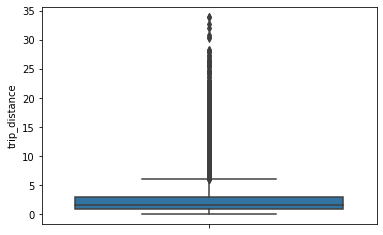

In [ ]:
# Create box plot of trip_distance

sns.boxplot(y = df['trip_distance'])
plt.show()

In [ ]:
df['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

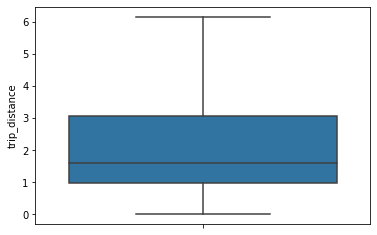

In [ ]:
sns.boxplot(y = df['trip_distance'], showfliers = False)
plt.show()

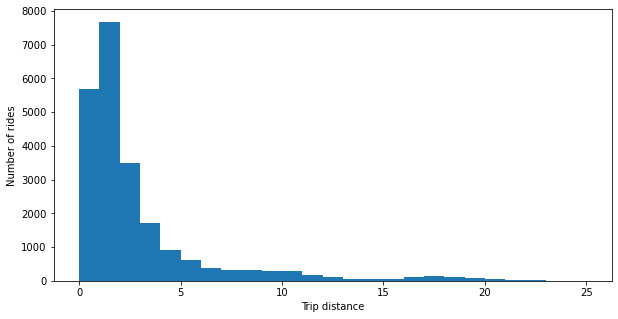

In [ ]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
plt.hist(x = df['trip_distance'], bins = range(0,26,1));
plt.xlabel('Trip distance');
plt.ylabel('Number of rides');
plt.show()

**total amount**

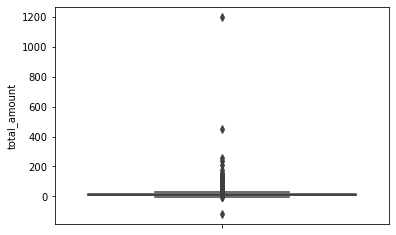

In [ ]:
# Create box plot of total_amount
sns.boxplot(y = df['total_amount'])
plt.show()

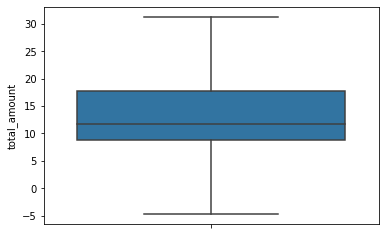

In [ ]:
sns.boxplot(y = df['total_amount'], showfliers = False)
plt.show()

In [ ]:
df['total_amount'].describe()

count    22699.000000
mean        16.310502
std         16.097295
min       -120.300000
25%          8.750000
50%         11.800000
75%         17.800000
max       1200.290000
Name: total_amount, dtype: float64

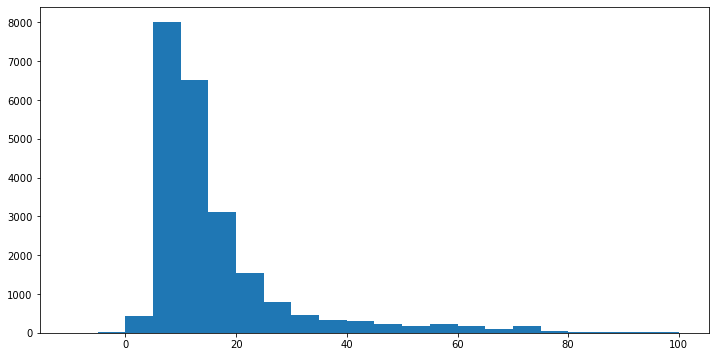

In [ ]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
plt.hist(x = df['total_amount'], bins = range(-10,101,5))
plt.show()

**tip amount**

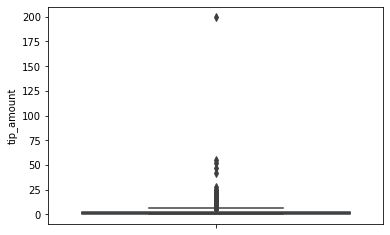

In [ ]:
# Create box plot of tip_amount
sns.boxplot(y = df['tip_amount'])
plt.show()

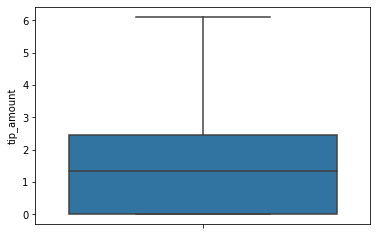

In [ ]:
sns.boxplot(y = df['tip_amount'], showfliers = False)
plt.show()

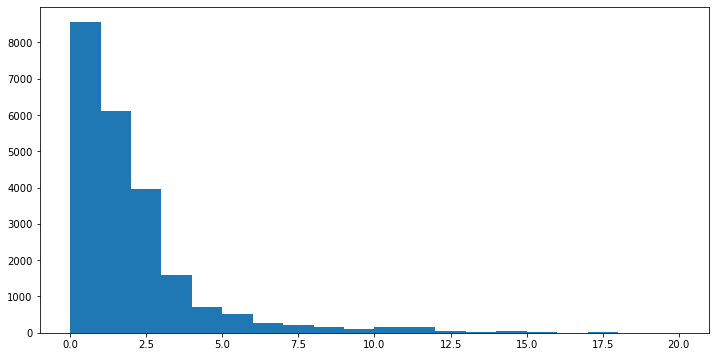

In [ ]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
plt.hist(x = df['tip_amount'], bins = range(0,21,1))
plt.show()

**tip_amount by vendor**

In [ ]:
by_vendor = df.groupby(df['VendorID'])['tip_amount'].sum().reset_index()
by_vendor

,VendorID,tip_amount
0,1,18506.62
1,2,23163.78


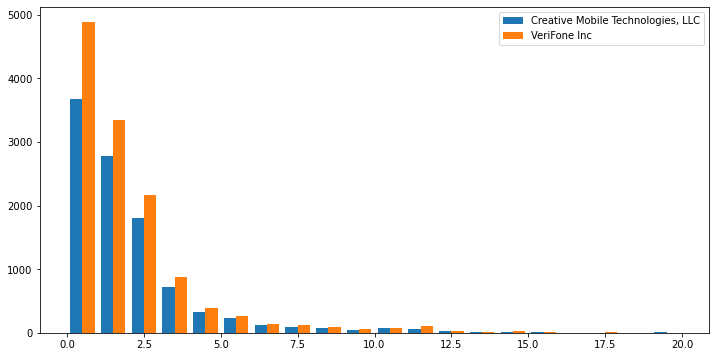

In [ ]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,6))
vend1 = df['tip_amount'][df['VendorID'] == 1]
vend2 = df['tip_amount'][df['VendorID'] == 2]
plt.hist(x = [vend1, vend2], bins = range(0,21,1), histtype='bar',)
plt.gca().legend(('Creative Mobile Technologies, LLC','VeriFone Inc'))
plt.show()

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

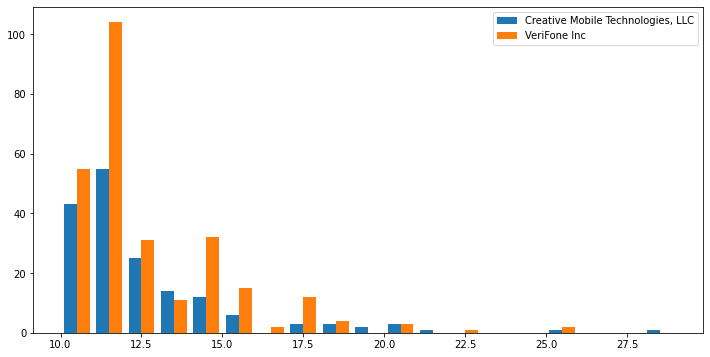

In [ ]:
# Create histogram of tip_amount by vendor for tips > $10
plt.figure(figsize=(12,6))
vend1 = df['tip_amount'][(df['VendorID'] == 1) & (df['tip_amount'] > 10)]
vend2 = df['tip_amount'][(df['VendorID'] == 2) & (df['tip_amount'] > 10)]
plt.hist(x = [vend1, vend2], bins = range(10,30,1), histtype='bar')
plt.gca().legend(('Creative Mobile Technologies, LLC','VeriFone Inc'))
plt.show()

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [ ]:
passenger_count = df['passenger_count'].unique()
sorted(passenger_count)

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# Calculate mean tips by passenger_count
by_passenger_count = df.groupby(df['passenger_count'])['tip_amount'].mean().reset_index()
by_passenger_count

,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


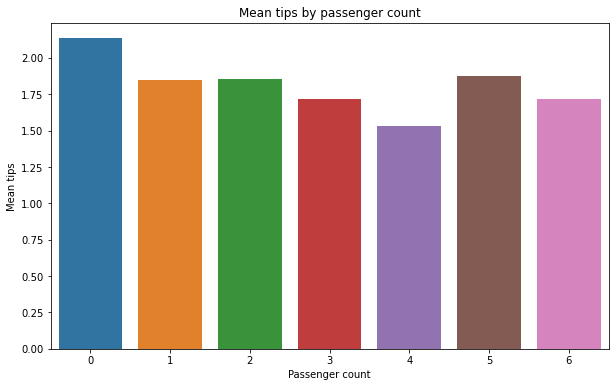

In [ ]:
# Create bar plot for mean tips by passenger count

plt.figure(figsize=(10,6));

sns.barplot(
    data = by_passenger_count,
    x = 'passenger_count',
    y = 'tip_amount');
plt.xlabel('Passenger count');
plt.ylabel('Mean tips');
plt.title('Mean tips by passenger count')
plt.show()

**Create month and day columns**

In [ ]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_trip_duration,month,day_of_week
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,April,Saturday


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_trip_duration,month,day_of_week
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,April,Saturday


In [ ]:
# Get total number of rides for each month
by_month = df.groupby(df['month'])['ID'].count()
by_month

month
April        2019
August       1724
December     1863
February     1769
January      1997
July         1697
June         1964
March        2049
May          2013
November     1843
October      2027
September    1734
Name: ID, dtype: int64

Reorder the results to put the months in calendar order.

In [ ]:
# Reorder the monthly ride list so months go in order

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

by_month = by_month.reindex(months_order, axis=0)
by_month

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: ID, dtype: int64

In [ ]:
# Show the index
by_month.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

In [ ]:
by_month = by_month.reset_index()
by_month

,month,ID
0,January,1997
1,February,1769
2,March,2049
3,April,2019
4,May,2013
5,June,1964
6,July,1697
7,August,1724
8,September,1734
9,October,2027


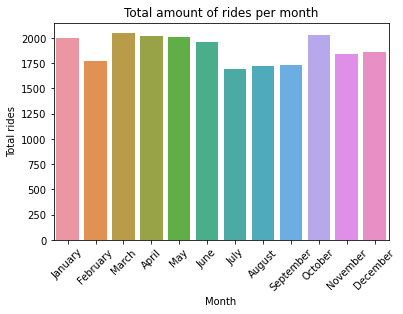

In [ ]:
# Create a bar plot of total rides per month

sns.barplot(
    data = by_month,
    x = 'month',
    y = 'ID');
plt.xlabel('Month');
plt.ylabel('Total rides');
plt.title('Total amount of rides per month');
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Repeat the above process, this time for rides by day

by_day = df.groupby(df['day_of_week'])['ID'].count()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_day = by_day.reindex(week_order, axis=0)
by_day = by_day.reset_index()
by_day

,day_of_week,ID
0,Monday,2931
1,Tuesday,3198
2,Wednesday,3390
3,Thursday,3402
4,Friday,3413
5,Saturday,3367
6,Sunday,2998


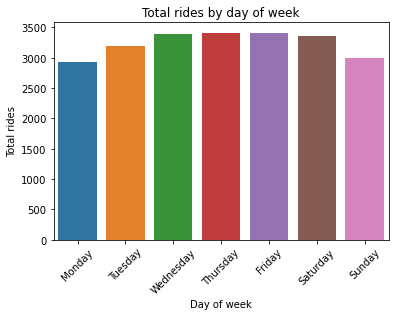

In [ ]:
# Create bar plot for ride count by day

sns.barplot(
    data = by_day,
    x = 'day_of_week',
    y = 'ID');
plt.xlabel('Day of week');
plt.ylabel('Total rides');
plt.title('Total rides by day of week');
plt.xticks(rotation = 45)
plt.show()


In [ ]:
# Repeat the process, this time for total revenue by day
rev_by_day = df.groupby(df['day_of_week'])['total_amount'].sum()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rev_by_day = rev_by_day.reindex(week_order, axis=0)
rev_by_day = rev_by_day.reset_index()
rev_by_day

,day_of_week,total_amount
0,Monday,49574.37
1,Tuesday,52527.14
2,Wednesday,55310.47
3,Thursday,57181.91
4,Friday,55818.74
5,Saturday,51195.40
6,Sunday,48624.06


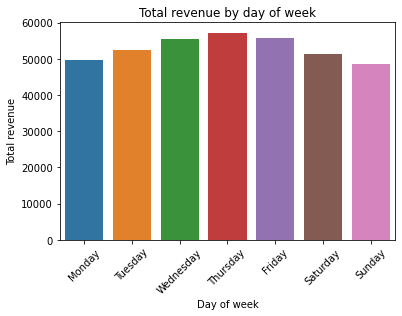

In [ ]:
# Create bar plot of total revenue by day
sns.barplot(
    data = rev_by_day,
    x = 'day_of_week',
    y = 'total_amount');
plt.xlabel('Day of week');
plt.ylabel('Total revenue');
plt.title('Total revenue by day of week');
plt.xticks(rotation = 45)
plt.show()

**Plot total revenue by month**

In [ ]:
# Repeat the process, this time for total revenue by month

rev_by_month = df.groupby(df['month'])['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
rev_by_month = rev_by_month.reindex(months_order, axis=0)
rev_by_month = rev_by_month.reset_index()
rev_by_month

,month,total_amount
0,January,31735.25
1,February,28937.89
2,March,33085.89
3,April,32012.54
4,May,33828.58
5,June,32920.52
6,July,26617.64
7,August,27759.56
8,September,28206.38
9,October,33065.83


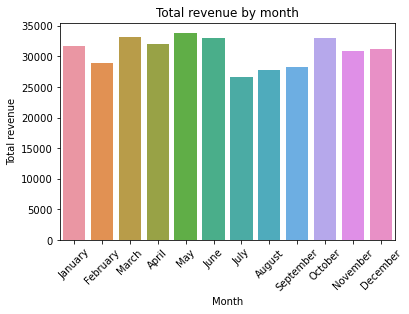

In [ ]:
# Create a bar plot of total revenue by month

sns.barplot(
    data = rev_by_month,
    x = 'month',
    y = 'total_amount');
plt.xlabel('Month');
plt.ylabel('Total revenue');
plt.title('Total revenue by month');
plt.xticks(rotation = 45)
plt.show()

**Plot mean trip distance by drop-off location**

In [ ]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [ ]:
# Calculate the mean trip distance for each drop-off location
by_do_loc = df.groupby(df['DOLocationID'])['trip_distance'].mean()

# Sort the results in descending order by mean trip distance
by_do_loc = by_do_loc.sort_values().reset_index()
by_do_loc

,DOLocationID,trip_distance
0,207,1.200000
1,193,1.390556
2,237,1.555494
3,234,1.727806
4,137,1.818852
...,...,...
211,51,17.310000
212,11,17.945000
213,210,20.500000
214,29,21.650000


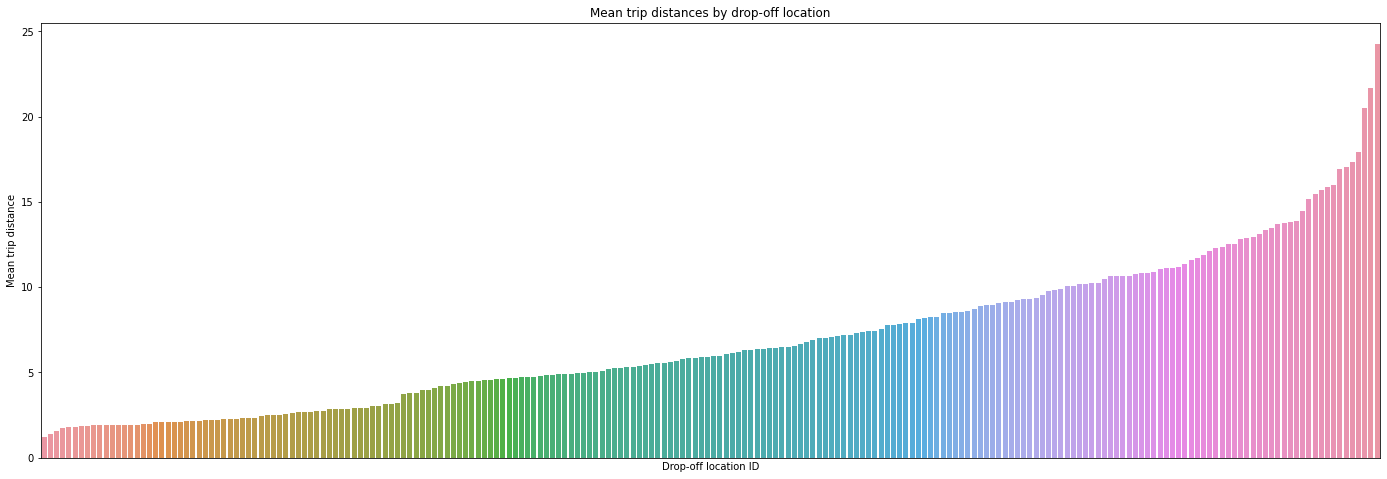

In [ ]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(24,8));

ax = sns.barplot(
    data = by_do_loc,
    x = by_do_loc.index,
    y = 'trip_distance');
plt.xlabel('Drop-off location ID');
plt.ylabel('Mean trip distance');
plt.title('Mean trip distances by drop-off location');
ax.set_xticks([])
plt.show()

**Conclusion**

Although we can observe a strict linear dependency between trip distance and total amount, there is a bunch of rides with no distance but fare amounts.

For trip distance, the median is 1.61 miles. The distribution of trip distance is skewed right.

The median total amount is $11.8, and notably, there are instances of negative values.

Interestingly, the mean tip amount is highest with no passengers on a ride.

Creative Mobile Technologies, LLC gets noticeably more tips than VeriFone Inc. Higher tips may be related to the overall higher number of trips and the higher number of rides paid by card, which has Creative Mobile Technologies, LLC.

The total number of monthly rides shows us the lowest numbers in July, August, and September. The same picture is for monthly revenue.

The highest numbers of rides are in March and October. The highest revenue is in March, May, and October.
